<blockquote><b>Abstract:</b> This report deals with tooth detection in realistic situations, characterized with relatively small number (in this case, 114 panoramic radiographs) of images for training object detection models, with differing qualities (contrasts, lightness) and sizes. The objective of the work is to define the pipeline and framework of decisions in x-ray images object detection problems. Faster RCNN architecture is used for detection; the approach includes transfer learning, augmentation and normalization (Contrast Limited Adaptive Histogram Equalization) of x-ray images. Resulting model performance is comparable with or exceeding the state of the art in the field, with mean Average Precision for the test set of mAP=0.96-0.97.</blockquote>

# Introduction

Artificial Intelligence (AI) has become an integral part of radiology practice in the last two decades. Four main tasks of the AI-driven computer vision are classification, localization, object detection, and object segmentation.

In dentristry, panoramic radiography is the most common diagnosis technique because of its low cost, simplicity, informative content, and the reduced exposure of the patient. 

Object detection is used in dentistry for detection of teeth, caries, filled crown, prosthesis, dental implants, vertical root fractures, jaw fractures, unerupted teeth, endodontic treatment, periodontal bone loss, apical lesions, osteosarcoma, ameloblastoma, osteodystrophy and systemic bone diseases. Objects are detected from panoramic, periapical or bitewing radiograph images. Some other applications found in literature are bone healing analysis, diagnosis of osteoporosis, dental forensics, automatic segmentation of mandible in panoramic x-ray, dental implants placement, orthodontic assessment (mispositioned teeth and jaws), identification and filtering of x-ray artifacts.

Today, Region-based Convolutional Neural Network (R-CNN) is the first choice for object detection problems. It was proposed by Girshick et al (2014). Initially, R-CNN architecture consisted of three models:

1.   Region proposal - generation and extraction of region of interest, rectangle frame for possible object locations, independent of the class (Selective Search method for object recognition by Uijlings et al, 2013 was used for extraction).
2.   Proposed regions are then passed to a feature extractor - extraction of features from each of the individual regions (pre-trained AlexNet deep CNN was initially used),
3.   Classifier (Support Vector Machine - SVM).

Although successful, R-CNN model was slow because feature extraction is carried out from each of the regions of interest. Actually, the R-CNN architecture is a sequential set of three different models, for localization, feature extraction and classification. On 2015, Girshick proposed Fast R-CNN architecture (Girshick, 2015). This model was integrated. For feature extraction, VGG-16 was used, after which RoI pooling layer is positioned to crop the parts of the feature map and resize those. Then, neural network follows with two outputs: class prediction (softmax) and bounding box. A year later, Ren et al (2016) proposed Faster R-CNN model. This model, during training forms region proposals (Regional Proposal Network - RPN). Thus, model consists of two modules: RPN and Fast R-CNN. The latest model is Mask R-CNN (He et al, 2018). It builds upon Faster R-CNN by adding output model for image segmentation. The network backbone (feature extractor and classifier) is a Resnet101 architecture.

Before Region-based CNN introduced integration of localization of objects of interest in the image, different localization methods were combined with image classification algorithms, with different success. Oktay (2017) used modified AlexNet CNN architecture to achieve "higher than 90%" accuracy. Nung-Hsiang et al (2018) achieved up to 96% accuracy in teeth detection. Tuzoff et al (2019) used Faster RCNN architecture with pre-trained ImageNet weights and VGG16 feature extraction blocks for teeth detection in panoramic radiographs. Training was carried out with 1352 and 222 images were used for testing (all images from a single machine). Precision was 0.9945. Up to date information on use of deep learning models in dentistry can be found in several survey papers which provided additional insight into the topic (Schwendicke et al, 2019; Hwang et al, 2019).



The general objective of the work behind this paper is to setup a pipeline for object detection in x-ray images and establish a framework of decisions and optional alternatives for achieving the best possible accuracies equal to or near the state of the art. The problem to be dealt with is a tooth detection from relatively small number of images of differing qualities and sizes.

## Methodology

Number of experiments in Google Colab environment, involving training and evaluation will be carried out, to investigate the effect of the different aspects and activities in data pre-processing and training. 

Open dataset consisting of anonymized and deidentified panoramic dental X-rays of 116 patients, taken at Noor Medical Imaging Center, Qom, Iran was used in this research (Abdi and Kasaei, 2020). All images were annotated by the author of this report by using Microsoft's Visual Object Tagging Tool (VoTT) software. 3314 teeth are annotated in images. Annotations were exported in Pascal VOC format. Annotated image dataset (Pascal VOC format) consists of images and XML files generated for each of the image in the dataset. XML files store coordinates of the bounding boxes/rectangles and annotations. 80% of all data will be used for training, where out of this number, 80% will be a training set, while remaining 20% will be used as validation set for backpropagation. 20% of data will be used only for evaluation, once the training is completed.

Some fixed decisions are made based on the existing experience in the object detection domain. First, Faster RCNN model will be used (its Python Keras Mask RCNN implementation) as it is top of the shelf model today. Second, transfer learning based on the existing CoCo model will be used in convolutional layers for more efficient feature engineering, while only RPN, classifier and mask layers will be trained with data. Transfer learning helps to build efficient models with less training (less annotated data).

Variables are related to deciding on the aspects of image normalization, retraining (fine tuning), augmentation and learning rate. Normally, image data will be of variable size and quality; the latter one is especially important for grayscale x-ray images as they may have different contrasts and lightnesses and they often suffer from the occurence of so-called [artifacts](https://radiopaedia.org/articles/x-ray-artifacts) (for example, abnormal shadows, degraded image quality, etc.). Second, retraining is sometimes carried out with goal to train convolutional layes to better highlight different geometric features occuring in the objects of interest; the effect of retraining will be investigated. Third, augmentation technique is often used to compensate for insufficient size of the training set, which is quite common for medical image recognition and object detection field; will augmentation improve the capability of the model to generalize and detection precision? Finally, different learning rates will be tested for the best accuracy. 

### Metrics

Object detection model is used for predicting bounding boxes. Thus, the accuracy of the prediction can be evaluated based on how well the predicted and actual bounding boxes overlap. Accuracy is calculated by dividing the intersection area (overlap) by the total area of both bounding boxes. This is often referred to as "intersection over union" or IoU. A perfect bounding box prediction will have an IoU of 1. It is common to assume that a positive prediction of a bounding box is made if the IoU is greater than 0.5, e.g. they overlap by 50% or more.

Each prediction of the bounding box is associated with the confidence score - the probability that the box contains an object. In order to have a prediction, that probability needs to be greater than some threshold. All this is performed by the classifier.

Precision refers to the percentage of the correctly predicted bounding boxes (IoU > 0.5) out of all bounding boxes predicted in one image. Recall is the percentage of the correctly detected objects (predicted bounding boxes, IoU > 0.5) out of all objects in the image. Average precision metric (AP) (Salton and McGill, 1983) is the most commonly used metric for object detection problems and it was introduced as a standard metric for PASCAL VOC competition. In short, AP is the area under the precision-recall curve, where this curve shows the combined precision and recall values for different IoU thresholds.

The performance of a model for an object detection task is typically evaluated using the mean absolute precision, or mAP. The average or mean of the average precision (AP) across all of the images in a dataset is called the mean average precision, or mAP.

# Implementation

All variable parameters used for setting the conditions of the individual experiments are defined in the configuration class.

In [1]:
class ExperimentConfig():
  EPOCHS=10
  EQUALIZATION=True
  AUGMENTATION=False
  FINE_TUNING=False
  LEARNING_RATE=0.01
  TRAINTESTRATIO=0.8
  TRAINVALRATIO=0.8

exp=ExperimentConfig()

First, a folder structure is created in the Google Colab session and assets needed for the training and object detection are downloaded.

In [2]:
%%shell
mkdir logs
mkdir models

The project uses modified Keras implementation of Mask R-CNN model by Abdulla (2017). The implementation is modified to work with Keras version 2.4.3 supported by Google Colab. History object for tracking losses across epochs is also introduced as a return value of train function in models.py. Modified implementation is cloned from the git repo, together with all data (images and XML files with annotations).

In [3]:
!git clone https://github.com/milanzdr/toothdetector

Cloning into 'toothdetector'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 256 (delta 31), reused 69 (delta 30), pack-reused 182
Receiving objects: 100% (256/256), 162.46 MiB | 46.65 MiB/s, done.
Resolving deltas: 100% (111/111), done.


In [4]:
%%shell
mv toothdetector/* .

CoCo model weights for transfer learning are downloaded.

In [5]:
!wget -P models --quiet https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5

In [6]:
import warnings
import os
import pandas as pd
import numpy as np
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from numpy import expand_dims
from numpy import mean
from matplotlib import pyplot
from matplotlib.patches import Rectangle
import datetime
import cv2
import imgaug

warnings.filterwarnings("ignore")

Tensorflow version 1.15 is used

In [7]:
%tensorflow_version 1.x
from mrcnn.utils import Dataset
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.utils import compute_ap
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image

TensorFlow 1.x selected.


Using TensorFlow backend.


For the purpose of Exploratory Data Analysis (EDA), all bounding boxes of all files are stored in one DataFrame object. Number of rows correspond to the number of images/annotation files and number of columns is relative (for each box, xmin, xmax, ymin and ymax coordinates are stored) to the maximum number of annotated objects in a single image.

In [8]:
dir_anno = "data/Annotations"
img_dir  = "data/JPEGImages"
df_anno = []
for fnm in os.listdir(dir_anno):  
    if not fnm.startswith('robots'):
        tree = ElementTree.parse(os.path.join(dir_anno,fnm))
        root = tree.getroot()
        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        for box in root.findall('.//object'):
            row = []
            row.append(os.path.join(dir_anno,fnm))
            name = box.find('name').text
            xmin = float(box.find('bndbox/xmin').text)
            ymin = float(box.find('bndbox/ymin').text)
            xmax = float(box.find('bndbox/xmax').text)
            ymax = float(box.find('bndbox/ymax').text)
            row.append(xmin)
            row.append(ymin)
            row.append(xmax)
            row.append(ymax)
            row.append(name)
            df_anno.append(row)
df_anno = pd.DataFrame(df_anno)
df_anno.info()
df_anno.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3134 non-null   object 
 1   1       3134 non-null   float64
 2   2       3134 non-null   float64
 3   3       3134 non-null   float64
 4   4       3134 non-null   float64
 5   5       3134 non-null   object 
dtypes: float64(4), object(2)
memory usage: 147.0+ KB


,0,1,2,3,4,5
0,data/Annotations/36.xml,697.212932,203.200893,864.938685,485.772321,tooth
1,data/Annotations/36.xml,851.783724,183.486607,1009.643255,515.343750,tooth
2,data/Annotations/36.xml,986.622074,176.915179,1091.861761,485.772321,tooth
3,data/Annotations/36.xml,1062.263099,186.772321,1160.925307,482.486607,tooth
4,data/Annotations/36.xml,1137.904125,163.772321,1226.700111,495.629464,tooth


The histogram below shows distribution of patients with the different numbers of annotated teeth in the overall dataset.

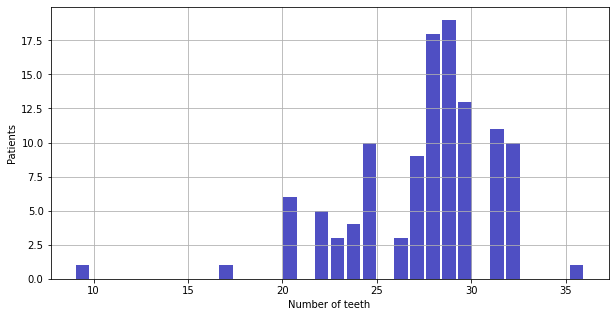

In [9]:
teethcounts=df_anno.groupby(0).count()[5].values
pyplot.figure(figsize=(10,5))
pyplot.hist(bins=32, x=teethcounts, color='#0504aa', alpha=0.7, rwidth=0.85)
pyplot.xlabel('Number of teeth')
pyplot.ylabel('Patients')
pyplot.grid()
pyplot.show()

## Data preparation for training Mask R-CNN model

Indexes of training, validation and test set boundaries, relative to the overall dataset are defined.

In [10]:
numimages=df_anno[0].nunique()
trainbreakdown=int(exp.TRAINTESTRATIO*numimages)
valbreakdown=int(exp.TRAINVALRATIO*trainbreakdown)

The mask-rcnn library requires that train, validation, and test datasets are instantiated as mrcnn.utils.Dataset objects. A new class that extends the mrcnn.utils.Dataset class is created. It implements a function to load the dataset load_dataset(), and it overrides two functions: for loading a mask (load_mask), where a mask is a two-dimensional array with the same dimensions as the photograph with all zero values where the object isn't and all one values where the object is in the image, and for loading an image reference (image_reference). The latter function is used to return the path or URL for a given image_id.

In [11]:
# class that defines and loads the orthopan dataset
class OrthopanDataset(Dataset):
    # load the dataset definitions
    def load_dataset(self, dataset_dir, is_train=True, is_val=True, is_test=True):
        # define one class
        self.add_class("dataset", 1, "tooth")
        # define data locations
        images_dir = dataset_dir + '/JPEGImages/'
        annotations_dir = dataset_dir + '/Annotations/'
        # find all images
        iid=0
        for filename in listdir(images_dir):
            if not filename.startswith('robots'):
              iid=iid+1
              # extract image id
              image_id = filename[:-4]
              # skip bad images
              if image_id in ['robots']:
                  continue
              # skip all images after valbreakdown if we are building the train set
              if is_train and iid >= valbreakdown:
                  continue
              if is_val and (iid < valbreakdown or iid >= trainbreakdown):
                  continue
              if is_test and iid < trainbreakdown:
                  continue
              img_path = images_dir + filename
              ann_path = annotations_dir + image_id + '.xml'
              # add to dataset
              self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)

    # extract bounding boxes from an annotation file
    def extract_boxes(self, filename):
        # load and parse the file
        tree = ElementTree.parse(filename)
        # get the root of the document
        root = tree.getroot()
        # extract each bounding box
        boxes = list()
        for box in root.findall('.//bndbox'):
            xmin = int(float(box.find('xmin').text))
            ymin = int(float(box.find('ymin').text))
            xmax = int(float(box.find('xmax').text))
            ymax = int(float(box.find('ymax').text))
            coors = [xmin, ymin, xmax, ymax]
            boxes.append(coors)
        # extract image dimensions
        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        return boxes, width, height

    # load the masks for an image
    def load_mask(self, image_id):
        # get details of image
        info = self.image_info[image_id]
        # define box file location
        path = info['annotation']
        # load XML
        boxes, w, h = self.extract_boxes(path)
        # create one array for all masks, each on a different channel
        masks = zeros([h, w, len(boxes)], dtype='uint8')
        # create masks
        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = 1
            class_ids.append(self.class_names.index('tooth'))
        return masks, asarray(class_ids, dtype='int32')

    # load an image reference
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

# train set
train_set = OrthopanDataset()
train_set.load_dataset('data', is_train=True, is_val=False, is_test=False)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

# val set
val_set = OrthopanDataset()
val_set.load_dataset('data', is_train=False, is_val=True, is_test=False)
val_set.prepare()
print('Val: %d' % len(val_set.image_ids))

# val set
test_set = OrthopanDataset()
test_set.load_dataset('data', is_train=False, is_val=False, is_test=True)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

Train: 71
Val: 19
Test: 24


One issue to handle before training is variability in gray level and contrast, due to use of different scanners. This variability may make it difficult to a model to learn right features. Some sort of normalization is needed to obtain images with similar contrasts. CLAHE (Contrast Limited Adaptive Histogram Equalization) is a histogram equalization technique that allows to enhance contrast locally while limiting the amplification of noise.

In [12]:
def equalize_clahe_image(image_path):
    img = cv2.imread(image_path, 0)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16,16))
    cl = clahe.apply(img)
    cv2.imwrite(image_path, cl)

if(exp.EQUALIZATION):
  for filename in listdir(img_dir):
    if not filename.startswith('robots'):
      equalize_clahe_image(os.path.join(img_dir,filename))

Below is the test that shows that images and masks are loaded correctly. Image and its mask are loaded and displayed (only a mask with index=2) is displayed.

(1360, 2950, 3)
(1360, 2950, 22)


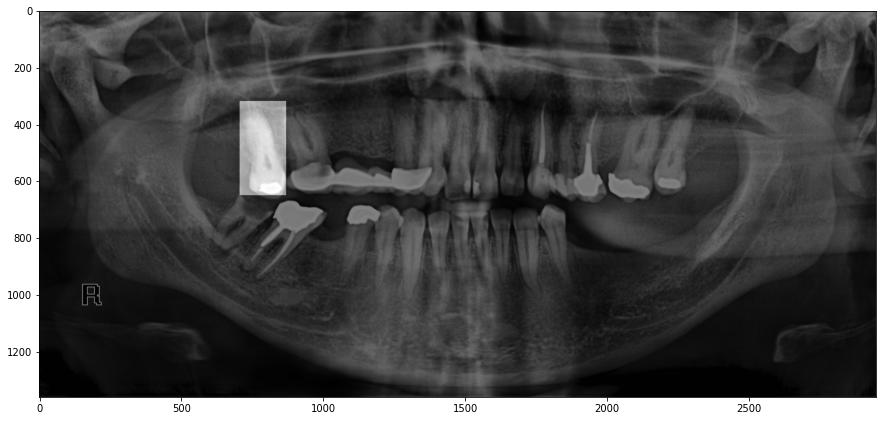

In [13]:
# load an image
pyplot.figure(figsize=(15,10))
image_id = 1
image = train_set.load_image(image_id)
print(image.shape)
# load image mask
mask, class_ids = train_set.load_mask(image_id)
print(mask.shape)
# plot image
pyplot.imshow(image)
# plot mask
pyplot.imshow(mask[:, :, 0], cmap='gray', alpha=0.5)
pyplot.show()

Mask R-CNN implementation provides its own utilities for displaying images and masks. For example, mrcnn.visualize.display_instances() function displays an image with bounding boxes, masks, and class labels.

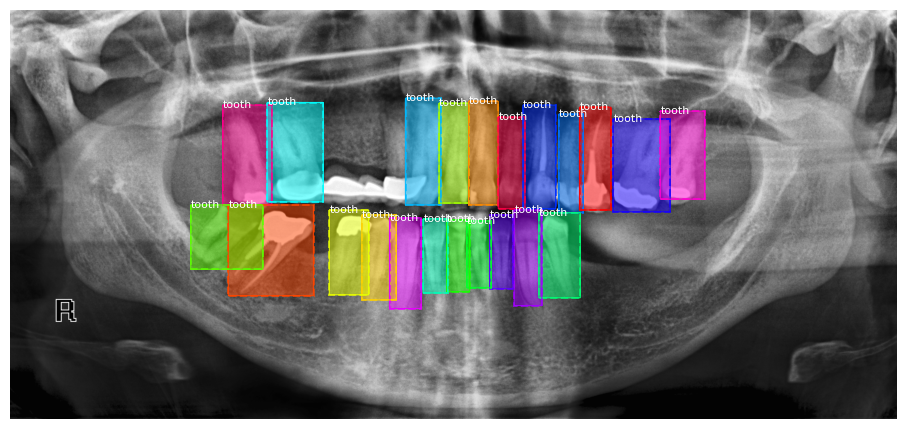

In [14]:
# define image id
image_id = 1
# load the image
image = train_set.load_image(image_id)
# load the masks and the class ids
mask, class_ids = train_set.load_mask(image_id)
# extract bounding boxes from the masks
bbox = extract_bboxes(mask)
# display image with masks and bounding boxes
display_instances(image, bbox, mask, class_ids, train_set.class_names)

## Training

A Mask R-CNN model can be fit from scratch. However, normally, much better results are achieved by using transfer learning. In our case, the Mask R-CNN model is pre-fit on the MS COCO object detection dataset.

A configuration object for the model that extends the mrcnn.config.Config class is defined. It implements properties of both the prediction problem (such as name and the number of classes) and the algorithm for training the model (such as the learning rate).

Mask R-CNN implementation of Faster RCNN resizes the images to 1024x1024 in order to support training of multiple images in a batch. Aspect ratio is preserved by padding with 0 pixels.

In [15]:
# define a configuration for the model
class OrthopanConfig(Config):
    # Give the configuration a recognizable name
    NAME = "orthopan_cfg"
    # Number of classes (background + orthopan)
    NUM_CLASSES = 1 + 1
    # Number of training steps per epoch (defining batch)
    STEPS_PER_EPOCH = trainbreakdown
    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    # GPU_COUNT = 1
    # IMAGES_PER_GPU = 8
    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    #TRAIN_ROIS_PER_IMAGE = 32
    # Use a small epoch since the data is simple
    #STEPS_PER_EPOCH = 100
    # use small validation steps since the epoch is small
    #VALIDATION_STEPS = 5

# prepare config
config = OrthopanConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

Model is created as an instance of the mrcnn.model.MaskRCNN class. It can be instantiated for the purpose of training or inference (value of mode parameter). The config parameter stores the reference to previously created OrthopanConfig class. During the training, the checkpoint models (weights) will be serialized in the specified location (model_dir parameter).

In [16]:
%%time
# define the model
model = MaskRCNN(mode='training', model_dir='./', config=config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
CPU times: user 4.6 s, sys: 29.8 ms, total: 4.63 s
Wall time: 4.74 s


The pre-defined model architecture and weights are loaded after the model was instantiated.

In [17]:
%%time
# load weights (mscoco)
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights('models/mask_rcnn_coco.h5', by_name=True, exclude=["mrcnn_class_logits", 
                                                                          "mrcnn_bbox_fc",  
                                                                          "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)




CPU times: user 4.15 s, sys: 716 ms, total: 4.86 s
Wall time: 12.5 s


Finally, the model is fit on the training dataset by calling the train method with passed training and validation datasets, specified learning rate parameter and number of epochs.

It is important to highlight here that only head layers of Mask R-CNN model will be trained. To summarize, feature engineering layers use existing weights while localizer and classifier are trained to detect objects of interests for this project (teeth).

Mask R-CNN uses imgaug library for image augmentation. Library converts a set of input images into a new, much larger set of slightly altered images. Alterations include Gaussian noise (contrast, sharpen), affine, cropping and padding, fliping, perspective and others. Only horizontal flipping will be done in augmentation step. Lightness will be addressed by images normalization. Vertical flipping may confuse the model as lower and upper teeth looks different on x-ray due to different occuring artifacts in different regions of the image.

In [18]:
%%time
# train weights (output layers or 'heads')
if(exp.AUGMENTATION):
  augmentation = imgaug.augmenters.Sometimes(1.0, [
                    imgaug.augmenters.Fliplr()
                    #imgaug.augmenters.Rotate((-30, 30))
                ])
else:
  augmentation = None

#model.set_log_dir(logdir)
h=model.train(train_set, val_set, learning_rate=exp.LEARNING_RATE, epochs=exp.EPOCHS, 
            augmentation=augmentation,
            layers='heads')


Starting at epoch 0. LR=0.01

Checkpoint Path: ./orthopan_cfg20200812T1126/mask_rcnn_orthopan_cfg_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (

Different train and test scores are reported during the training. When the problem addressed is object detection (and not segmentation), one should look at loss for the classification output on the train and validation datasets (mrcnn_class_loss and val_mrcnn_class_loss) and loss for the bounding box output for the train and validation datasets (mrcnn_bbox_loss and val_mrcnn_bbox_loss).

Loss plots are presented below. They provide indications on speed of convergence over epochs, whether the model has converged at some epoch (plateau) or whether the model is over-fitting after some epoch (increasing validation loss after some epoch).

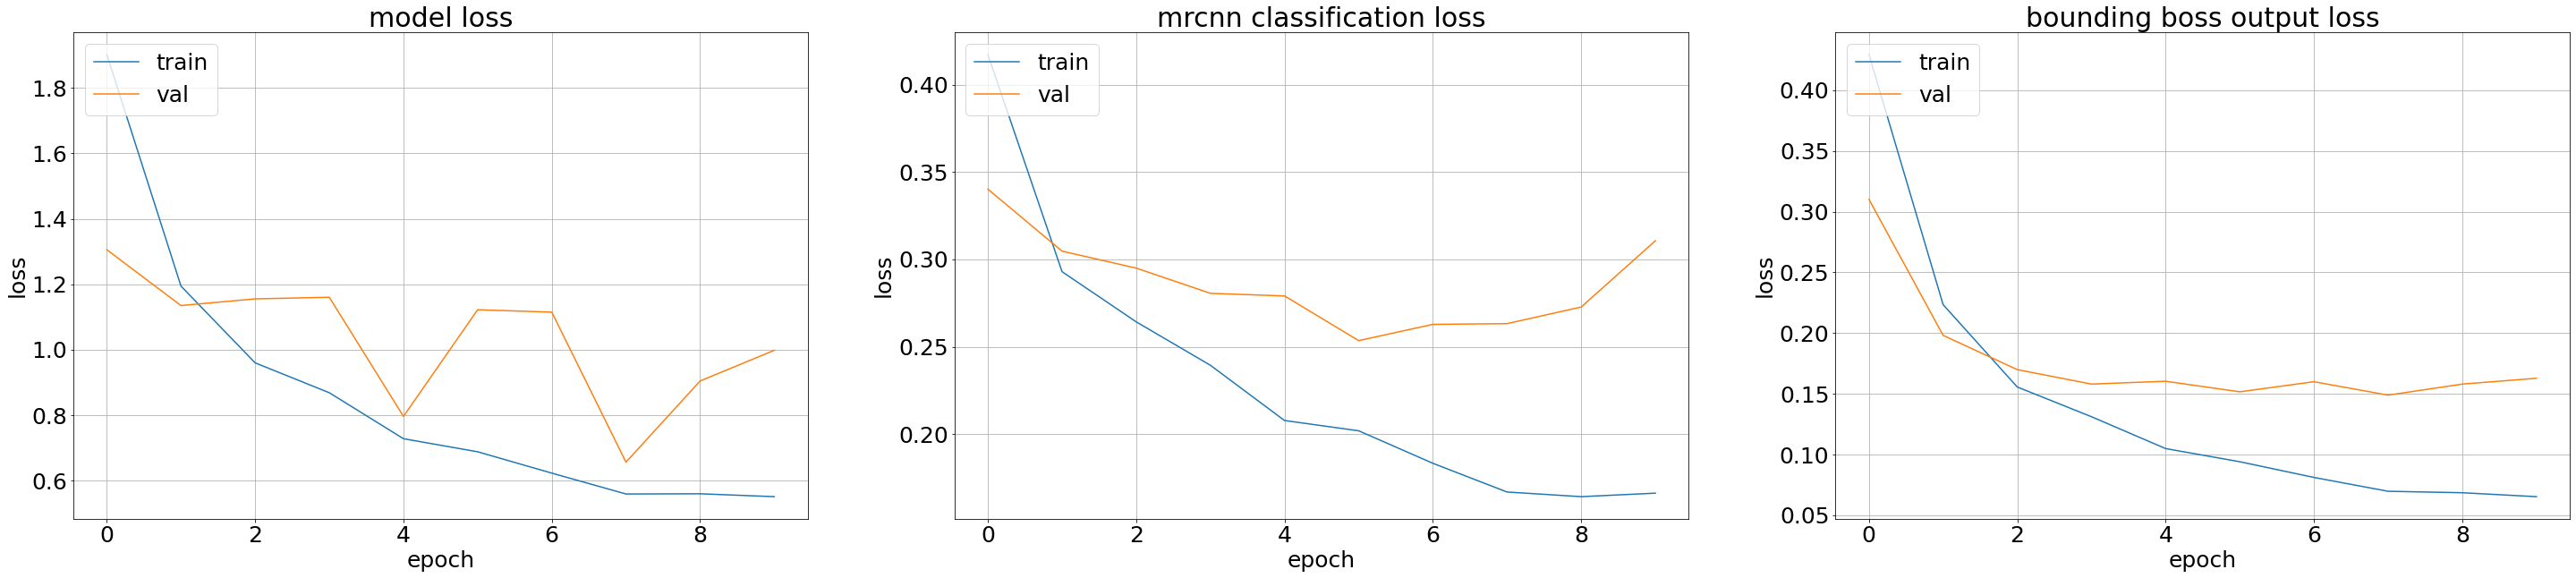

In [19]:
pyplot.figure(figsize=(50,10))
pyplot.rcParams.update({'font.size': 25})

pyplot.subplot(1, 3, 1)
pyplot.plot(h.history['loss'])
pyplot.plot(h.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'], loc='upper left')
pyplot.grid()

pyplot.subplot(1, 3, 2)
pyplot.plot(h.history['mrcnn_class_loss'])
pyplot.plot(h.history['val_mrcnn_class_loss'])
pyplot.title('mrcnn classification loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'], loc='upper left')
pyplot.grid()

pyplot.subplot(1, 3, 3)
pyplot.plot(h.history['mrcnn_bbox_loss'])
pyplot.plot(h.history['val_mrcnn_bbox_loss'])
pyplot.title('bounding boss output loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'], loc='upper left')
pyplot.grid()
pyplot.show()

Fine tuning is done - training of all layers.

In [20]:
%%time
# Fine tune all layers
# Passing layers="all" trains all layers. You can also 
# pass a regular expression to select which layers to
# train by name pattern.
if(exp.FINE_TUNING):
  model.train(train_set, val_set, learning_rate=config.LEARNING_RATE / 10, epochs=5, layers="all")

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.11 µs


In [21]:
# Models are automatically saved after each epoch, but for the convenience, final model is manually saved here
model.keras_model.save_weights('/content/models/mask_rcnn_orthopan.h5')

## Evaluation

Before evaluation takes place, a predictor is created. Separate configuration file is created for prediction purposes.

In [22]:
# define the prediction configuration
class PredictionConfig(Config):
    # define the name of the configuration
    NAME = "orthopan_cfg"
    # number of classes (background + kangaroo)
    NUM_CLASSES = 1 + 1
    # simplify GPU config
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

In [23]:
# create config
cfg = PredictionConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir='models', config=cfg)
# load model weights
model.load_weights('/content/models/mask_rcnn_orthopan.h5', by_name=True)



Instructions for updating:
Use `tf.cast` instead.


Model is evaluated by considering mean Average Precision (mAP) metrics. AP is calculated for each of the images in the test dataset and average AP is then used as a final evaluation metrics.

In [24]:
# calculate the mAP for a model on a given dataset
def evaluate_model(dataset, model, cfg):
    APs = list()
    for image_id in dataset.image_ids:
        # load image, bounding boxes and masks for the image id
        image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, image_id, use_mini_mask=False)
        # convert pixel values (e.g. center)
        scaled_image = mold_image(image, cfg)
        # convert image into one sample
        sample = expand_dims(scaled_image, 0)
        # make prediction
        yhat = model.detect(sample, verbose=0)
        # extract results for first sample
        r = yhat[0]
        # calculate statistics, including AP
        AP, _, _, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
        # store
        APs.append(AP)
    # calculate the mean AP across all images
    mAP = mean(APs)
    return mAP

Several experiments were made with partial and full dataset. Dataset is separated to training, validation and test set, where the latter is used only for evaluation (validation set is used in backpropagation) of the model. Some of the important conclusions are as follows:

* In general, conservative learning rate of LR=0.01 works better than the lower values,indicating possible overfitting in latter cases;
* Applying adaptive equalization (CLAHE) brings significant improvements. This is considered as a key for succesfull object detection model in this, realistic case (images from different machines, with different qualities, contrasts, lightnesses);
* Augmentation produce improvements in majority of experiments but not always. Its not possible to highlight the rules to be followed. Our recommendation would be to try it only once the final model has been developed. Further work here is needed to find the optimal configuration of the augmentation rules;
* Model fine tuning (retraining) does not improve the precision of object detection in this case;
* Training with 5 epochs is sufficient for satisfactory results. After that, model starts to overfit (classification and bounding box losses increase). Model achieves the accuracies (mean Average Precisions) in the area of 0.95-0.97 which is considered high when comparing with the state of the art.

In [25]:
%%time
# evaluate model on training dataset
train_mAP = evaluate_model(train_set, model, cfg)
print("Train mAP: %.3f" % train_mAP)
# evaluate model on validation dataset
val_mAP = evaluate_model(val_set, model, cfg)
print("Val mAP: %.3f" % val_mAP)
# evaluate model on test dataset
test_mAP = evaluate_model(test_set, model, cfg)
print("Test mAP: %.3f" % test_mAP)

Train mAP: 0.989
Val mAP: 0.962
Test mAP: 0.964
CPU times: user 2min 31s, sys: 21.7 s, total: 2min 53s
Wall time: 4min 24s


In [26]:
# plot a number of photos with predictions
def plot_actual_vs_predicted(dataset, model, cfg, n_images=5):
    pyplot.figure(figsize=(20,50))
    # load image and mask
    for i in range(n_images):
        # load the image and mask
        image = dataset.load_image(i)
        mask, _ = dataset.load_mask(i)
        # convert pixel values (e.g. center)
        scaled_image = mold_image(image, cfg)
        # convert image into one sample
        sample = expand_dims(scaled_image, 0)
        # make prediction
        yhat = model.detect(sample, verbose=0)[0]
        # define subplot
        #pyplot.subplot(n_images, 2, i*2+1)
        # plot raw pixel data
        #pyplot.imshow(image)
        #pyplot.title('Actual')
        # plot masks
        #for j in range(mask.shape[2]):
        #    pyplot.imshow(mask[:, :, j], cmap='gray', alpha=0.9)
        # get the context for drawing boxes
        pyplot.subplot(n_images, 1, i*1+1)
        # plot raw pixel data
        pyplot.imshow(image)
        pyplot.title('Predicted')
        ax = pyplot.gca()
        # plot each box
        for box in yhat['rois']:
            # get coordinates
            y1, x1, y2, x2 = box
            # calculate width and height of the box
            width, height = x2 - x1, y2 - y1
            # create the shape
            rect = Rectangle((x1, y1), width, height, fill=False, color='red')
            # draw the box
            ax.add_patch(rect)
    # show the figure
    
    pyplot.show()

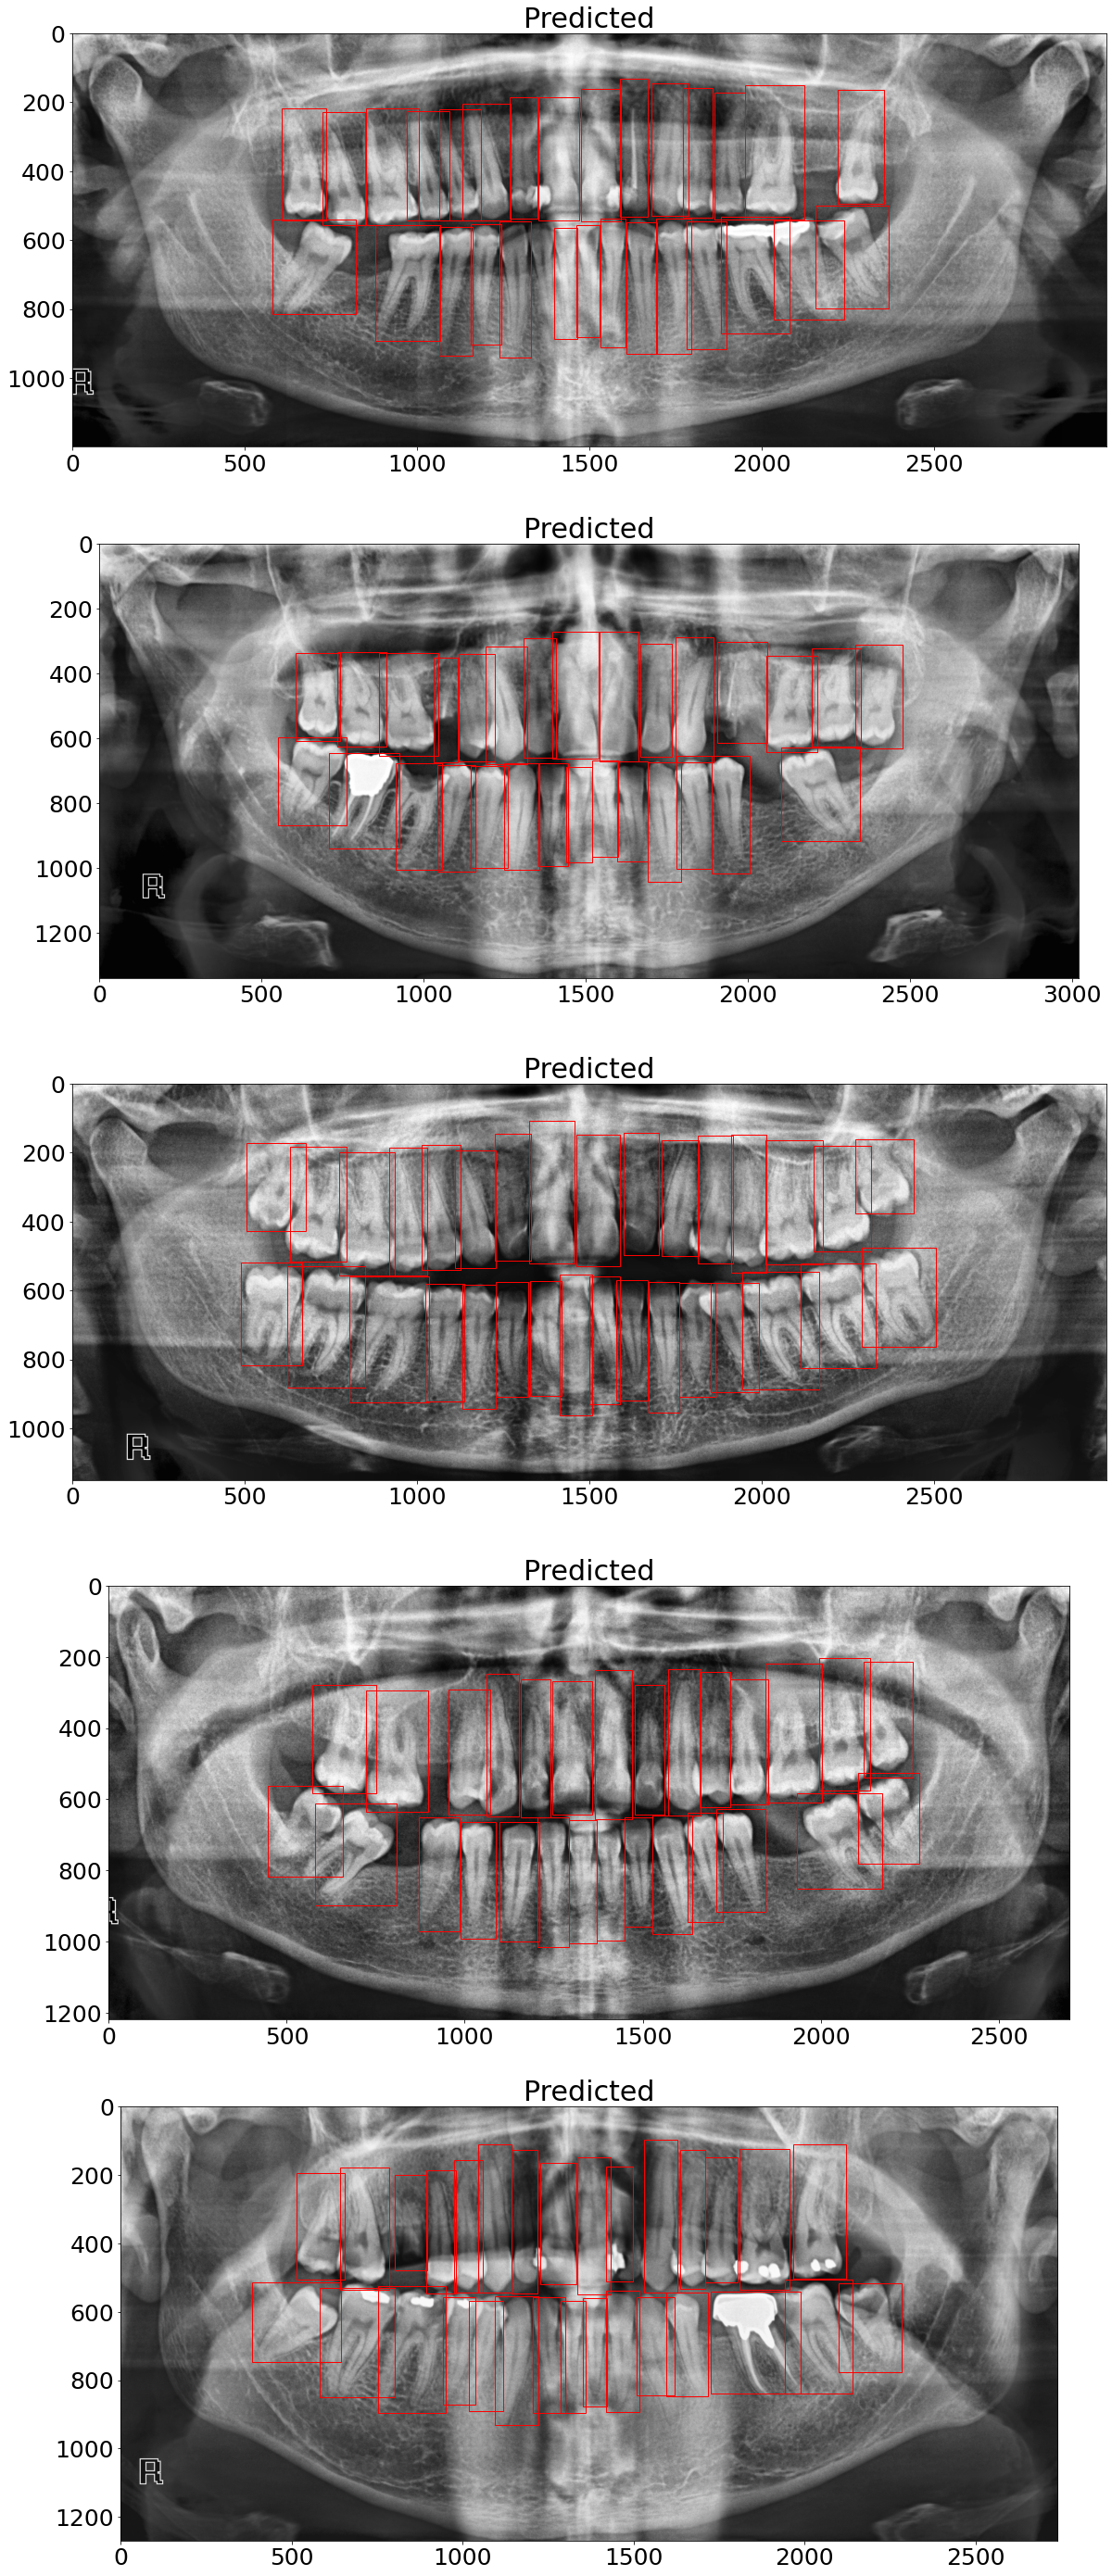

CPU times: user 7.3 s, sys: 1.48 s, total: 8.79 s
Wall time: 7.63 s


In [27]:
%%time
plot_actual_vs_predicted(test_set, model, cfg)

# Acknowledgement

The code provided by Jason Brownlee (Machine Learning Mastery blog) in [this](https://machinelearningmastery.com/how-to-train-an-object-detection-model-with-keras/) tutorial is extensively used in development as a baseline and as-is in some cases. The idea of using CLAHE for image normalization is credited to Clement Joudet and [this](https://medium.com/@clemkoa/deep-learning-on-dental-x-rays-part-2-fbee8382ffc3) Medium article.

# References

*   Abdulla, W. (2017) Mask R-CNN for object detection and instance 
segmentation on Keras and TensorFlow. GitHub. https://github.com/matterport/Mask_RCNN
*   Abdi, A.; Kasaei, S. (2020) Panoramic Dental X-rays With Segmented Mandibles, Mendeley Data, v2
http://dx.doi.org/10.17632/hxt48yk462.2
*   Girshick, R. (2015) Fast R-CNN. https://arxiv.org/abs/1504.08083
*   Girshick, R., DOnahue, J., Darrell, T., Malik, J. (2014) Rich feature hierarchies for accurate object detection and semantic segmentation. https://arxiv.org/abs/1311.2524
*   He, K., Gkioxari, G., Dollár, P., Girshick, R. (2018) Mask R-CNN. https://arxiv.org/abs/1703.06870
*   Uijlings, J.R.R., van de Sande, K.E.A., Gevers, T., Smeulders, A.W.M. 2013. Selective Search for Object Recognition. International Journal of Computer Vision volume 104, pages154–171(2013)
*   Salton, G., McGill, M. J. (1983). Introduction to modern information retrieval. McGraw-Hill. Retrieved from https://dl.acm.org/citation.cfm?id=576628
*   Tuzzof, D.V., Tuzova, L.N., Bornstein, M.M., Krasnov, A.S., Kharchenko, M.A., Nikolenko, S.I., Sveshnikov, M.M., Bednenko, G.B. (2019) Tooth detection and numbering in panoramic radiographs using convolutional neural networks. Dentomaxillofac Radiol. 48(4). https://www.birpublications.org/doi/full/10.1259/dmfr.20180051
*   Oktay, A.B. (2017) Tooth detection with Convolutional Neural Networks. 2017 Medical Technologies National Congress (TIPTEKNO). 10.1109/TIPTEKNO.2017.8238075
*   Nung-Hsiang, L., Ting-Lan, L., Xiaoyue, W., Wan-Ting, K., Hua-Wei, T., Shih-Lun, C., Yih-Shyh, L., Jocelyn Flores, V., Yu-Fang, K. (2018) Teeth Detection Algorithm and Teeth Condition Classification Based on Convolutional Neural Networks for Dental Panoramic Radiographs. Journal of Medical Imaging and Health Informatics. 8(3) 507-515(9). 10.1166/jmihi.2018.2354
*   Hwang, J.J., Jung, Y.H., Heo, M.S. (2019) An overview of deep learning in the field of dentistry. Imaging Sci Dent. 49(1):1-7. DOI:10.5624/isd.2019.49.1.1
*   Ren, S., He, K., Girshick, R., Sun, J. (2016) Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks. https://arxiv.org/abs/1506.01497
*   Schwendicke, F., Golla, T., Dreher, M., Krois, J. (2019) Convolutional neural networks for dental image diagnostics: A scoping review. Journal of Dentistry. 91(2019) 103226

